Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [2]:
df = pd.read_csv(
    r"C:\Users\yash1\OneDrive\Desktop\Coding\PDF_non_linear\data.csv",
    encoding="latin1"
)

print("Columns in dataset:")
print(df.columns)

x = df["no2"].dropna()

print("Number of samples:", len(x))

Columns in dataset:
Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
Number of samples: 419509


C:\Users\yash1\AppData\Local\Temp\ipykernel_25052\8661726.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Compute a_r and b_r

In [3]:
r = 102303796

a_r = 0.05 * (r % 7)
b_r = 0.3 * (r % 5 + 1)

print("\nComputed Parameters:")
print("r mod 7 =", r % 7)
print("a_r =", a_r)
print("r mod 5 =", r % 5)
print("b_r =", b_r)


Computed Parameters:
r mod 7 = 0
a_r = 0.0
r mod 5 = 1
b_r = 0.6


Transform x → z

In [4]:
z = x + a_r * np.sin(b_r * x)

print("\nTransformation applied.")
if a_r == 0:
    print("Since a_r = 0, transformation simplifies to: z = x")


Transformation applied.
Since a_r = 0, transformation simplifies to: z = x


Estimate Gaussian Parameters

In [5]:
mu = np.mean(z)
sigma2 = np.var(z)

lam = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

print("\n----- Learned Parameters -----")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)


----- Learned Parameters -----
mu = 25.809622897811263
lambda = 0.001460436525489001
c = 0.021560876239314915


Plot PDF

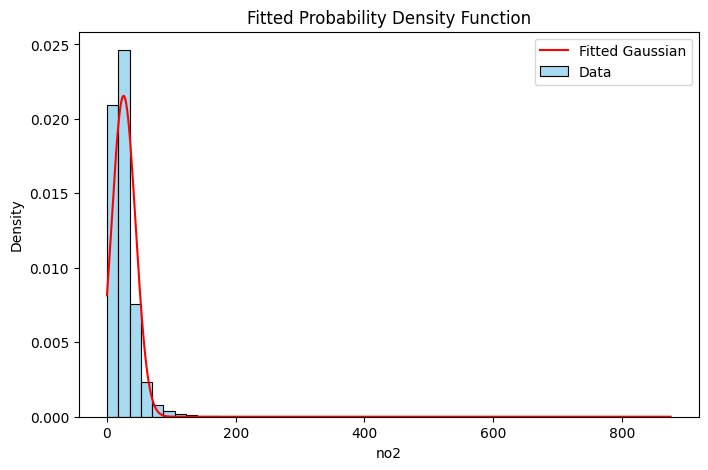

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(z, bins=50, stat="density", label="Data", color="skyblue")

z_vals = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lam * (z_vals - mu)**2)

plt.plot(z_vals, pdf, color="red", label="Fitted Gaussian")
plt.title("Fitted Probability Density Function")
plt.legend()
plt.show()